In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

import numpy as np

In [2]:
from qiskit import execute, Aer

simulator = Aer.get_backend('qasm_simulator')

In [3]:
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Tool Functions

In [5]:
from qiskit.quantum_info import DensityMatrix, Operator

# Quantum circuit to unitary matrix
def getDensityMatrix(circuit):
    return DensityMatrix(circuit).data

### - dagger and tensor 

In [6]:
state_0 = np.array([1, 0]) # |0>
state_1 = np.array([0, 1]) # |1>

In [7]:
from functools import reduce

Dag = lambda matrix: matrix.conj().T # Dag(M) = M†
Kron = lambda *matrices: reduce(np.kron, matrices) # Kron(state_0, state_0) is |00>

### - pretty print

In [8]:
def pm(matrix):
    for row in range(len(matrix)):
        for col in range (len(matrix[row])):
            print("{:.3f}".format(matrix[row][col]), end = " ")
        print()

# 2. Find <6> in 3-qubits database

In [9]:
# https://qiskit.org/textbook/ch-algorithms/grover.html

## 1.1 set up starting state

In [10]:
def initCircuit(n):
    circuit = QuantumCircuit(n, n)
    
    for i in range(n):
        circuit.h(i)    
    circuit.barrier()
    
    return circuit

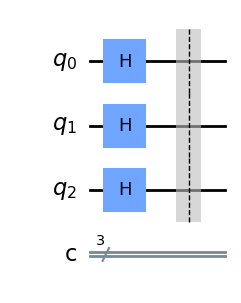

In [11]:
inputCircuit_3q = initCircuit(3)
inputCircuit_3q.draw(output='mpl')

## 2.2 creating Oracle for n=6

In [12]:
def createOracle_6():
    circuit = QuantumCircuit(3, 3)

    # Oracle for find 6

    # U_f 
    circuit.x(0)
    circuit.h(2)
    circuit.ccx(0, 1, 2)
    circuit.h(2)
    circuit.x(0)
    
    circuit.barrier()
    
    return circuit

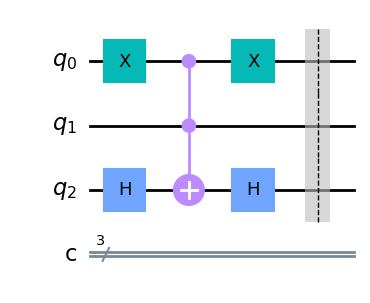

In [13]:
oracleCircuit_6 = createOracle_6()
oracleCircuit_6.draw(output='mpl')

### - test Oralce

In [14]:
# where the entry that correspond to the marked item will have a negative phase
pm(Operator(oracleCircuit_6).data)

1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j -1.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 


In [15]:
Operator(oracleCircuit_6).data

array([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
         0.+0.j],
       [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
         1.+0.j]])

## 2.3 Diffuser

In [95]:
# H R H, where R = 2|0><0| - I 

### 2.3.1 R = 2|0><0| - I  (Conditional phase shift gate)

In [16]:
def createR_3q():
    circuit = QuantumCircuit(3, 3)
    
    circuit.x(2)
    circuit.x(0)
    circuit.x(1)
    circuit.h(2)
    circuit.ccx(0, 1, 2)
    circuit.barrier(0)
    circuit.barrier(1)
    circuit.h(2)
    circuit.x(2)
    circuit.x(0)
    circuit.x(1)
    
    return circuit

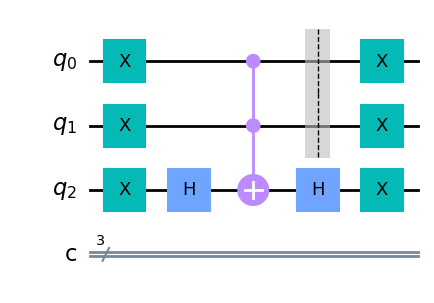

In [17]:
R_3q = createR_3q()
R_3q.draw(output='mpl')

### - test R

In [18]:
pm(Operator(R_3q).data)

-1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 0.000+0.000j 
0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 0.000+0.000j 1.000+0.000j 


In [19]:
print('|000>', Kron(state_0, state_0, state_0))
print('R|000>',Operator(R_3q).data @ Kron(state_0, state_0, state_0) )

print('|010>', Kron(state_0, state_1, state_0))
print('R|010>',Operator(R_3q).data @ Kron(state_0, state_1, state_0) )

print('|110>', Kron(state_1, state_1, state_0))
print('R|110>',Operator(R_3q).data @ Kron(state_1, state_1, state_0) )

|000> [1 0 0 0 0 0 0 0]
R|000> [-1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
|010> [0 0 1 0 0 0 0 0]
R|010> [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
|110> [0 0 0 0 0 0 1 0]
R|110> [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]


### 2.3.2 diffuser circuit

In [100]:
# H R H

In [20]:
def createDiffuser_3q():
    circuit = QuantumCircuit(3, 3)
    
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit = circuit.compose(createR_3q())
    circuit.h(0)
    circuit.h(1)
    circuit.h(2)
    circuit.barrier()
    
    return circuit

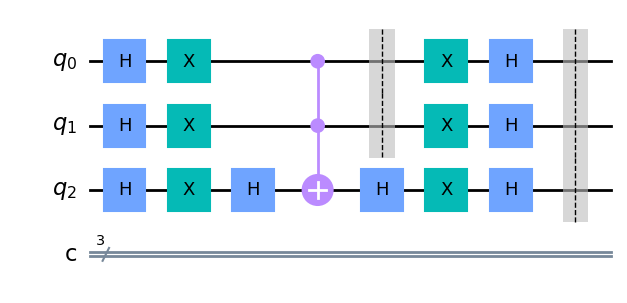

In [21]:
diffuserCircuit_3q = createDiffuser_3q()
diffuserCircuit_3q.draw(output='mpl')

### - test diffuser

In [22]:
pm(Operator(diffuserCircuit_3q).data)

0.750+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 
-0.250+0.000j 0.750+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 
-0.250+0.000j -0.250+0.000j 0.750+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 
-0.250+0.000j -0.250+0.000j -0.250+0.000j 0.750+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 
-0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 0.750+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 
-0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 0.750+0.000j -0.250+0.000j -0.250+0.000j 
-0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 0.750+0.000j -0.250+0.000j 
-0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j -0.250+0.000j 0.750+0.000j 


## 2.4 Grover iteration

In [23]:
def createGroverIteration(oracle, diffuser):
    return oracle.compose(diffuser)

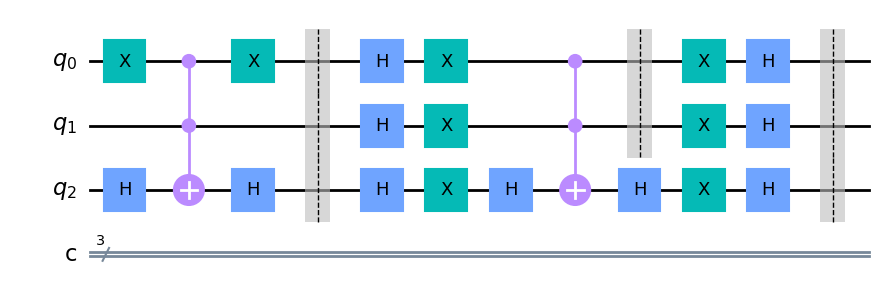

In [24]:
groverIteration_3q = createGroverIteration(createOracle_6(), createDiffuser_3q())
groverIteration_3q.draw(output='mpl')

## 2.5 Measure

In [25]:
groverIteration_3q = createGroverIteration(createOracle_6(), createDiffuser_3q())

### 2.5.0 input circuit

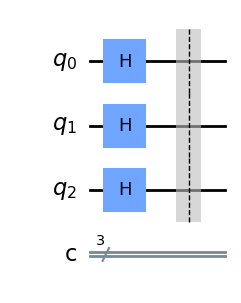

In [27]:
inputCircuit_3q = initCircuit(3)
inputCircuit_3q.draw(output='mpl')

In [28]:
inputCircuit_3q.measure([0, 1, 2], [0, 1, 2])

In [29]:
job = execute(inputCircuit_3q, simulator, shots = 10000)
results = job.result()
counts = results.get_counts(inputCircuit_3q)
print(counts)

{'001': 1219, '010': 1212, '011': 1265, '100': 1279, '000': 1278, '101': 1217, '110': 1280, '111': 1250}


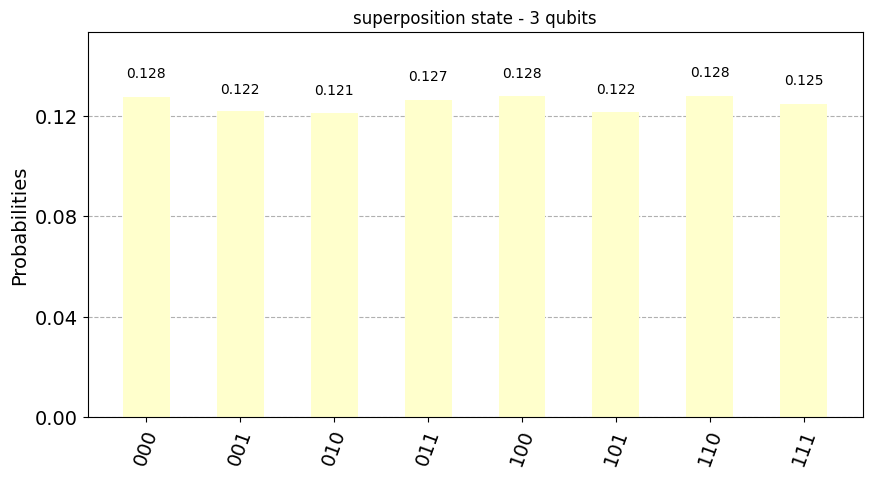

In [30]:
plot_histogram(counts, figsize=(10, 5), color="#FFFFCC", title="superposition state - 3 qubits")

### 2.5.1 one grover iteration

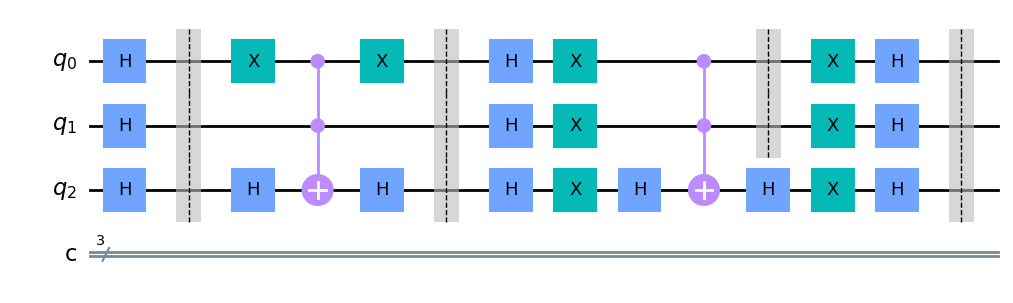

In [26]:
grover_3q_1 = initCircuit(3).compose(groverIteration_3q.copy())
grover_3q_1.draw(output='mpl')

In [31]:
grover_3q_1.measure([0, 1, 2], [0, 1, 2])

In [32]:
job = execute(grover_3q_1, simulator, shots = 10000)
results = job.result()
counts = results.get_counts(grover_3q_1)
print(counts)

{'110': 7808, '011': 329, '111': 321, '000': 287, '101': 314, '010': 341, '001': 289, '100': 311}


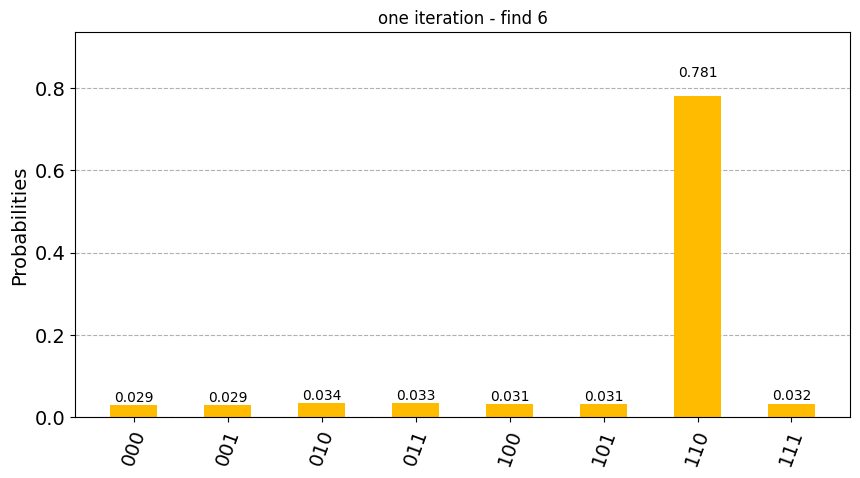

In [33]:
plot_histogram(counts, figsize=(10, 5), color="#FFBB00", title="one iteration - find 6")

### 2.5.2 two grover iteration

In [34]:
grover_3q_2 = initCircuit(3).compose(groverIteration_3q.copy()).compose(groverIteration_3q.copy())
# grover_3q_2.draw(output='mpl')

In [35]:
grover_3q_2.measure([0, 1, 2], [0, 1, 2])

In [36]:
job = execute(grover_3q_2, simulator, shots = 10000)
results = job.result()
counts = results.get_counts(grover_3q_2)
print(counts)

{'110': 9403, '111': 76, '101': 98, '000': 98, '011': 78, '001': 89, '100': 79, '010': 79}


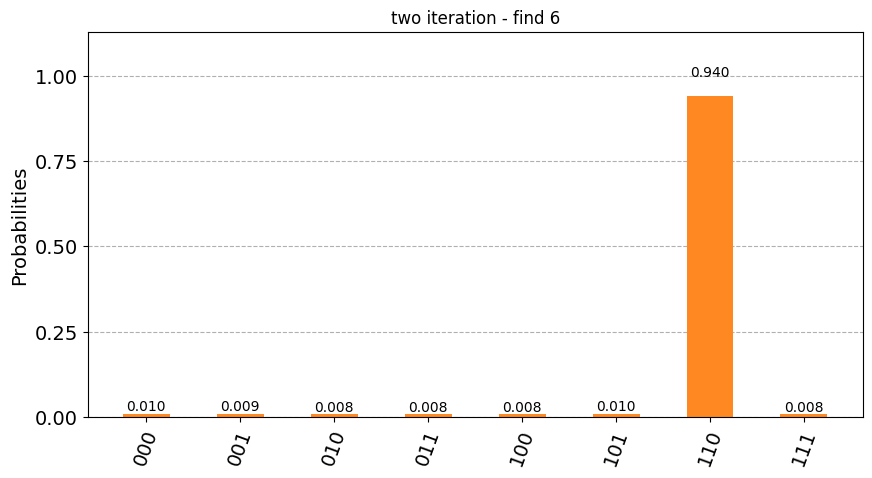

In [37]:
plot_histogram(counts, figsize=(10, 5), color="#FF8822", title="two iteration - find 6")

### 2.5.3 two grover iteration

In [38]:
grover_3q_3 = initCircuit(3).compose(groverIteration_3q.copy()).compose(groverIteration_3q.copy()).compose(groverIteration_3q.copy())
# grover_3q_3.draw(output='mpl')

In [39]:
grover_3q_3.measure([0, 1, 2], [0, 1, 2])

In [40]:
job = execute(grover_3q_3, simulator, shots = 10000)
results = job.result()
counts = results.get_counts(grover_3q_3)
print(counts)

{'000': 976, '111': 945, '110': 3294, '010': 998, '100': 940, '101': 944, '001': 958, '011': 945}


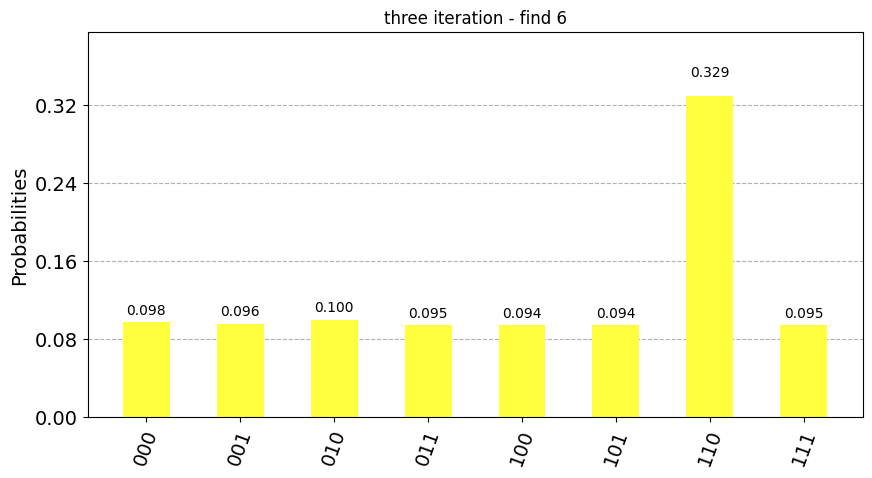

In [41]:
plot_histogram(counts, figsize=(10, 5), color="#FFFF3F", title="three iteration - find 6")